## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [1]:
#loading the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
houseprice = pd.read_csv("train_houseprice.csv")

In [3]:
#screening the dataset
houseprice.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
#knowing the structure
houseprice.info()
houseprice.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

There are total 1460 rows with 81 columns. 

In [5]:
#converting to Categorical variables based on the data 
# List of columns to convert
columns_to_convert = [
    'MSSubClass', 'OverallQual', 'OverallCond','MoSold','BsmtFullBath', 'BsmtHalfBath',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageCars'
]

# Convert to categorical
houseprice[columns_to_convert] = houseprice[columns_to_convert].astype('category')

These columns represent discrete categories or ordinal values, not continuous numerical data.

In [6]:
#checking again
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   ca

In [7]:
#Finding out the numerical columns 
numerical_columns = houseprice.select_dtypes (include =['number']).columns.tolist()
#for count using len()
len(numerical_columns)

25

There are 25 numerical columns.

In [8]:
#finding out the categorical columns
categorical_columns = houseprice.select_dtypes(include = ["object", "category"]).columns.tolist()
len(categorical_columns)

56

In [ ]:
There are 56 categorical columns.

In [9]:
#Checking for Statistical summary
round(houseprice.describe())

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.0,1201.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,70.0,10517.0,1971.0,1985.0,104.0,444.0,47.0,567.0,1057.0,...,473.0,94.0,47.0,22.0,3.0,15.0,3.0,43.0,2008.0,180921.0
std,422.0,24.0,9981.0,30.0,21.0,181.0,456.0,161.0,442.0,439.0,...,214.0,125.0,66.0,61.0,29.0,56.0,40.0,496.0,1.0,79443.0
min,1.0,21.0,1300.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0,34900.0
25%,366.0,59.0,7554.0,1954.0,1967.0,0.0,0.0,0.0,223.0,796.0,...,334.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0,129975.0
50%,730.0,69.0,9478.0,1973.0,1994.0,0.0,384.0,0.0,478.0,992.0,...,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,2008.0,163000.0
75%,1095.0,80.0,11602.0,2000.0,2004.0,166.0,712.0,0.0,808.0,1298.0,...,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,2009.0,214000.0
max,1460.0,313.0,215245.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,2010.0,755000.0


This is showing the statistical summary of this dataset

In [10]:
#missing values identification
missing_values = houseprice.isna().sum()
missing_values

# Filter columns with missing values
missing_values1 = missing_values[missing_values > 0]
missing_values1

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
#calculating missing percentage for each column
# List of columns with missing values
columns_with_missing = [
    'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature'
]

# Calculate missing percentage for each column
missing_percentage = (houseprice[columns_with_missing].isnull().sum() / len(houseprice)) * 100

# Display the result
print("Missing percentage for each column:")
print(round(missing_percentage))

Missing percentage for each column:
LotFrontage      18.0
Alley            94.0
MasVnrType        1.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
Electrical        0.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64


Columns with missing percentage greater than 30% will be considered to be dropped off as they don't contain potential values to reflect the data.
Columns with less than 30% will be considered to be imputed by mean and median for numerical columns and for categorical columns can be used mode.
Columns less than 5% - rows can be dropped off the rows with missing values.

Here, PoolQC, FireplaceQu,Fence,MiscFeature,Alley are with the missing perchentage >30%. So we can consider to drop off the columns as they're not giving potential valuess.
Here, LotFrontage, GarageType, GarageYrBlt, GarageFinish,GarageQual, GarageCond are having the missing percentage > 5%. So we will impute the values either median (as skewed )and mode for categorical.
Otherwise the columns with less than 5% missing percentage, we will drop off the rows with missing values.


In [12]:
#dropping off columns with higher missing percentage
# Identify columns with missing percentage > 30%
columns_to_drop = columns_to_drop = missing_percentage[missing_percentage > 30].index

# Drop the columns
houseprice = houseprice.drop(columns=columns_to_drop, axis=1)

# Verify the columns were dropped
print("Columns dropped:", columns_to_drop)

Columns dropped: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [13]:
#columns with missing percentage of 5-30% 
#GarageType (6%), GarageYrBlt (6%), GarageFinish (6%), GarageQual (6%), GarageCond (6%):
#impute those mising values with None as Categorical - meaning no garage is present
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
houseprice[garage_columns] = houseprice[garage_columns].fillna({
    'GarageType': 'None',
    'GarageYrBlt': 0,
    'GarageFinish': 'None',
    'GarageQual': 'None',
    'GarageCond': 'None'
})

In [14]:
#BsmtQual (3%), BsmtCond (3%), BsmtExposure (3%), BsmtFinType1 (3%), BsmtFinType2 (3%)
bsmt_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
houseprice[bsmt_columns] = houseprice[bsmt_columns].fillna('None')


In [15]:
#columns with missing percentage of 5-30% 
#LotFrontage (18%) - impute with median - as numerical
houseprice['LotFrontage'].fillna(houseprice['LotFrontage'].median(), inplace=True)

In [16]:
#columns with missing percentage of >5%
#MasVnrType (1%)- none (as categorical), MasVnrArea (1%) - 0 (as numerical)
houseprice['MasVnrType'].fillna('None', inplace=True)
houseprice['MasVnrArea'].fillna(0, inplace=True)


In [17]:
#Electrical (0%) - drop column as containing one missing value
#Drop rows where the Electrical column has missing values
houseprice.dropna(subset=['Electrical'], inplace=True)


In [19]:
#checking for missing values for verifying the imputation
houseprice.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Here's showing no column is containing missing values.

In [18]:
#outliers count for numerical columns
# Detecting and printing outliers for each numeric column using the IQR method
for col in numerical_columns:
    Q1 = houseprice[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = houseprice[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower limit for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper limit for outliers

    # Filtering outliers
    outliers = houseprice[(houseprice[col] < lower_bound) | (houseprice[col] > upper_bound)]
    
    # Printing outlier values for each column
    print(f"Outliers in {col}:") #print the columns name
    print(outliers[col].values) # Prints the actual outlier values
    print("-" * 50) #seperator
    
    # Printing outliers count for each column
    outliers_count = outliers.shape[0]  # Count of outliers
    print(f"Number of outliers in {col}: {outliers_count}")
    print("-" * 50)  # Separator

Outliers in Id:
[]
--------------------------------------------------
Number of outliers in Id: 0
--------------------------------------------------
Outliers in LotFrontage:
[110. 108. 112. 115. 110.  24.  21. 121. 122.  24. 120. 134. 110. 141.
  24.  24. 174.  21.  21. 174.  21.  21. 120.  30. 129. 140. 120. 118.
 116. 150. 111.  21. 109. 130.  21.  24.  21. 137. 110.  21.  21.  24.
 130.  24.  30.  21.  21.  21. 120. 110.  24.  24.  30. 110. 144. 114.
  24.  30.  21. 128. 116. 149.  30.  21. 313.  24.  24.  24. 122. 130.
 121.  21. 115.  21.  21.  21. 120.  24.  24.  24. 114. 168. 182. 134.
  24. 109. 120. 118. 138. 160.  24. 152.  21. 124.  21. 313. 108. 108.
  24. 153. 120. 129. 124.  30.  21.  21.]
--------------------------------------------------
Number of outliers in LotFrontage: 106
--------------------------------------------------
Outliers in LotArea:
[ 50271  19900  21000  21453  19378  31770  22950  25419 159000  19296
  39104  19138  18386 215245 164660  20431  18800  531

In [ ]:
Number of outliers in LotFrontage: 106
Number of outliers in LotArea: 68
Number of outliers in YearBuilt: 7
Number of outliers in MasVnrArea: 98
Number of outliers in BsmtFinSF1: 7
Number of outliers in BsmtFinSF2: 167
Number of outliers in BsmtUnfSF: 29
Number of outliers in TotalBsmtSF: 61
Number of outliers in 1stFlrSF: 20
Number of outliers in 2ndFlrSF: 2
Number of outliers in LowQualFinSF: 26
Number of outliers in GrLivArea: 31
Number of outliers in GarageYrBlt: 81
Number of outliers in GarageArea: 21
Number of outliers in WoodDeckSF: 32
Number of outliers in OpenPorchSF: 77
Number of outliers in EnclosedPorch: 208
Number of outliers in 3SsnPorch: 24
Number of outliers in ScreenPorch: 116
Number of outliers in PoolArea: 7
Number of outliers in MiscVal: 52
Number of outliers in SalePrice: 61

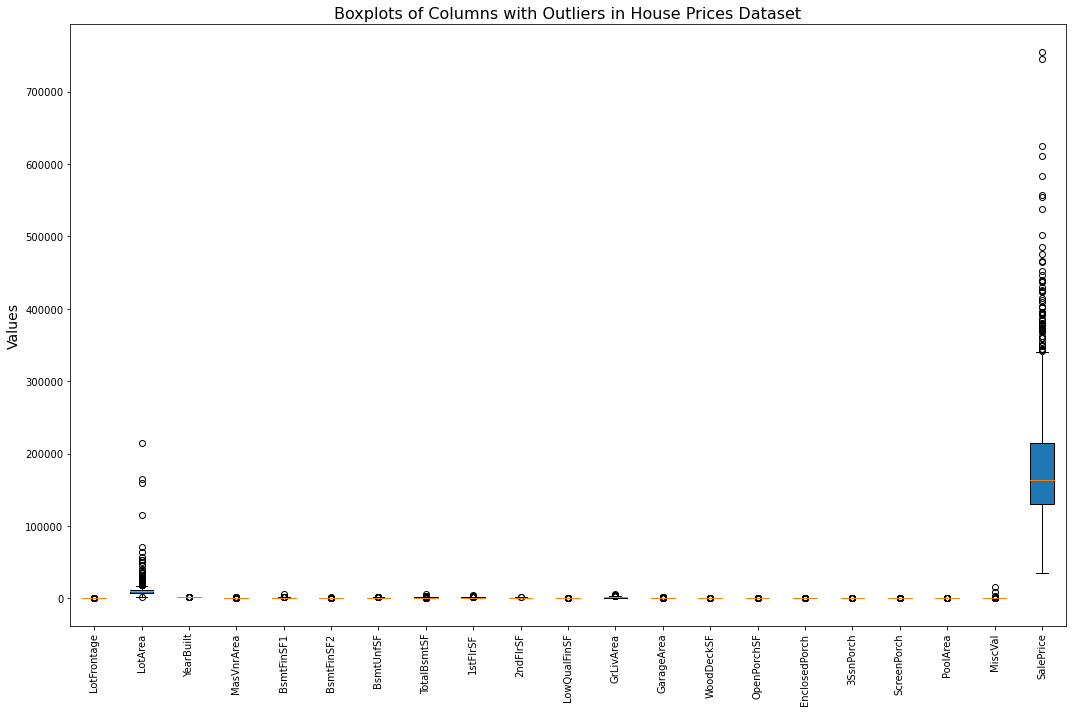

In [19]:
#boxplot
# Define the columns with outliers
outlier_columns = [
    "LotFrontage", "LotArea", "YearBuilt","MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "SalePrice"
]

# Create boxplots
plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility
plt.boxplot([houseprice[col].dropna() for col in outlier_columns], labels=outlier_columns, patch_artist=True)

# Add title and labels
plt.title("Boxplots of Columns with Outliers in House Prices Dataset", fontsize=16)
plt.ylabel("Values", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

1. Lot Area:
Right-skewed with several outliers. This indicates that most houses have lot areas around the median, but there are a few properties with significantly larger lot areas.

2. LotArea:
Right-skewed with many outliers (very large lots).Most houses are on smaller lots, but there are a few properties with very large lot areas, which could be estates or rural properties.

3. YearBuilt:
Range:Typically 1870 to 2020.
Slightly left-skewed (more newer homes).
The dataset includes a mix of older and newer homes, with a concentration of homes built in the mid-20th century.

4. MasVnrArea (Masonry Veneer Area):
Median: Around 0 (many homes have no masonry veneer).
Right-skewed with outliers.
Most homes have little to no masonry veneer, but a few have significant amounts, which could indicate higher-end construction.

5. TotalBsmtSF (Total Basement Square Feet):
Most homes have moderate-sized basements, but a few have very large basements, which could indicate larger or more luxurious homes with distribution of Right-skewed with outliers

6. GrLivArea (Above-Grade Living Area):
Most homes have moderate living areas, but a few have very large living spaces (right skewed with outliers), which could indicate larger or more luxurious homes.

7. GarageArea:
Most homes have moderate-sized garages, but a few have very large garages (right skewed with outliers), which could indicate luxury homes or homes with multiple cars.

8. SalePrice:
Most homes are moderately priced, but there are a few high-priced outliers, which could indicate luxury properties.



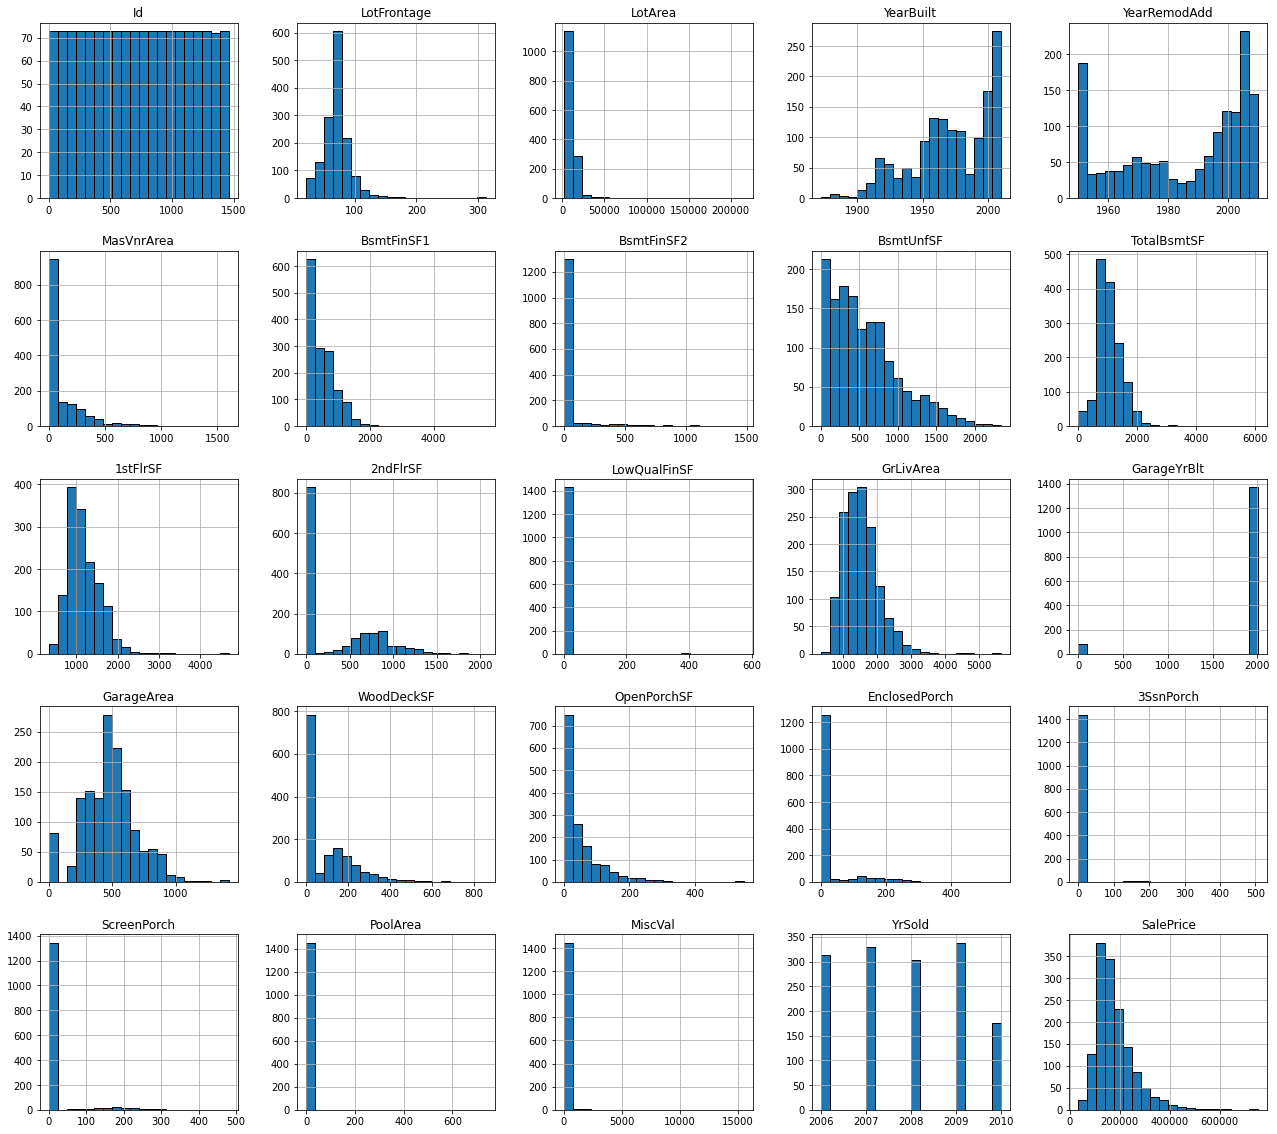

In [20]:
#histogram
#find out the numerical columns
numerical_columns = houseprice.select_dtypes(["number"]).columns.tolist()
numerical_columns
#create histograms for these
#dataframe[numerical columns].hist(figuresize = , bins = , edge color=)
houseprice[numerical_columns].hist(figsize=(22, 20), bins=20, edgecolor="black")

#show the plot
plt.show()

Lot Frontage Histogram:
The data is right-skewed. Most houses have lot frontages ranging from 50 to 100 feet, meaning most properties have moderate frontages. There's also a peak around the 70 feet mark, indicating that many houses fall within this range. The count decreases as the lot frontage increases, with fewer houses having very large frontages.

Lot Area Histogram:
The data is right-skewed. The most houses have lot areas ranging from 5,000 to 15,000 square feet, meaning most properties are of moderate size. There's also a peak around the 10,000 square feet mark, indicating that many houses fall within this range. The count decreases as the lot area increases, with fewer houses having very large lot areas.

YearBuilt Histogram:
For the YearBuilt histogram, the data is right-skewed. Most houses were built between 1950 and 2000, indicating that the majority of properties are relatively modern. There's a peak around the 1970s to 1980s, suggesting a construction boom during this period. The count decreases for houses built before 1950 and after 2000.

YearRemodAdd Histogram:
The data is right-skewed. Most houses were remodeled or added between 1980 and 2010, indicating recent updates and improvements. There's a peak around the early 2000s, showing that many houses were remodeled during this time. The count decreases for houses remodeled before 1980.

ManvnrArea Histogram:
The data is right-skewed. Most houses have a main veneer area ranging from 0 to 500 square feet, meaning the majority of houses have smaller veneer areas. There's a peak at the lower end, indicating that many houses have minimal or no veneer. The count decreases as the main veneer area increases, with fewer houses having very large veneer areas.

BsmtFinSF1 Histogram:
The data is right-skewed. Most houses have the first finished basement area ranging from 0 to 1,000 square feet, meaning many properties have smaller finished basement areas. There's a peak at the lower end, indicating that many houses either have no finished basement area or a small one. The count decreases as the finished basement area increases.

BsmtFinSF2 Histogram:
The data is right-skewed. Most houses have the second finished basement area ranging from 0 to 500 square feet, meaning many properties have smaller or no second finished basement areas. There's a peak at the lower end, indicating that many houses have minimal or no second finished basement area. The count decreases as the second finished basement area increases.

BsmtUnfSF Histogram:
The data is right-skewed. Most houses have unfinished basement areas ranging from 0 to 1,000 square feet, meaning many properties have smaller unfinished basement areas. There's a peak at the lower end, indicating that many houses have minimal or no unfinished basement area. The count decreases as the unfinished basement area increases.

TotalBsmtSF Histogram:
The data is right-skewed. Most houses have total basement areas ranging from 500 to 1,500 square feet, meaning many properties have moderately sized basements. There's a peak around the 1,000 square feet mark, indicating that many houses fall within this range. The count decreases as the total basement area increases, with fewer houses having very large total basement areas.

1stFlrSF (First Floor Square Footage):
The data is right-skewed. Most houses have a first floor area ranging from 800 to 2000 square feet, meaning most properties have moderately sized first floors. There's a peak around the 1200-1400 square feet mark, indicating that many houses fall within this range. The count decreases as the first floor area increases, with fewer houses having very large first floors.

2ndFlrSF (Second Floor Square Footage):
The data is right-skewed. Many houses have zero square footage on the second floor, indicating they are single-story homes. For those with a second floor, the square footage varies widely, with a peak around 400-800 square feet. The count decreases as the second floor area increases, with fewer houses having very large second floors.

LowQualFinSF (Low Quality Finished Square Footage):
The data is right-skewed. Most houses have zero low-quality finished square footage, indicating that this feature is uncommon. There are a few houses with low-quality finished areas, but they are rare. The count decreases as the low-quality finished area increases.

GrLivArea (Above Ground Living Area):
The data is right-skewed. Most houses have above-ground living areas ranging from 1000 to 2500 square feet, meaning many properties have a decent amount of living space. There's a peak around the 1500-2000 square feet mark, indicating that many houses fall within this range. The count decreases as the living area increases, with fewer houses having very large living areas.

GarageYrBlt (Garage Year Built):
The data is spread across many years with a slight right-skew. There's a noticeable peak around the 2000s, indicating a higher frequency of garage construction during that period. The count decreases for garages built before 1950 and after 2010, reflecting fewer garages from those periods.

GarageArea (Garage Area):
The data is right-skewed. Most garages have an area ranging from 200 to 800 square feet, meaning most properties have moderately sized garages. There's a peak around the 400-600 square feet mark, indicating that many garages fall within this range. The count decreases as the garage area increases, with fewer houses having very large garages.

WoodDeckSF (Wood Deck Square Footage):
The data is right-skewed. Many houses have zero wood deck square footage, indicating that not all houses have a wood deck. For those that do, the square footage varies, with a peak around 100-200 square feet. The count decreases as the wood deck area increases, with fewer houses having very large wood decks.

OpenPorchSF (Open Porch Square Footage):
The data is right-skewed. Many houses have zero open porch square footage, indicating that not all houses have an open porch. For those that do, the square footage varies, with a peak around 20-100 square feet. The count decreases as the open porch area increases, with fewer houses having very large open porches.

EnclosedPorch (Enclosed Porch Square Footage):
The data is right-skewed. Most houses have zero enclosed porch square footage, indicating that enclosed porches are relatively uncommon. For those that do have enclosed porches, the square footage varies widely. The count decreases as the enclosed porch area increases.

3SsnPorch (Three-Season Porch Square Footage):
The data is right-skewed. Most houses have zero three-season porch square footage, indicating that this feature is rare. There are a few houses with three-season porches, but they are uncommon. The count decreases as the three-season porch area increases.

ScreenPorch (Screen Porch Square Footage):
The data is right-skewed. Most houses have zero screen porch square footage, indicating that screen porches are uncommon. There are a few houses with screen porches, but they are rare. The count decreases as the screen porch area increases.

PoolArea (Pool Area Square Footage):
The data is right-skewed. Most houses have zero pool area, indicating that pools are rare in this dataset. There are very few houses with pool areas, and those that do have varying pool sizes. The count decreases as the pool area increases.

MiscVal (Miscellaneous Feature Value):
The data is right-skewed. Most houses have a miscellaneous value of zero, indicating that additional features are uncommon. For those that do have additional features, the values vary widely. The count decreases as the miscellaneous feature value increases.

YrSold (Year Sold):
The data is evenly spread across several years. The histogram shows the frequency of house sales for each year. There are peaks in certain years, indicating higher sales activity during those periods. The count is relatively consistent, reflecting steady house sales over the years.

SalePrice (Sale Price):
The data is right-skewed. Most houses have sale prices ranging from $100,000 to $300,000, meaning most properties are within this price range. There's a peak around $150,000 to $200,000, indicating that many houses fall within this range. The count decreases as the sale price increases, with fewer houses in the higher price range.






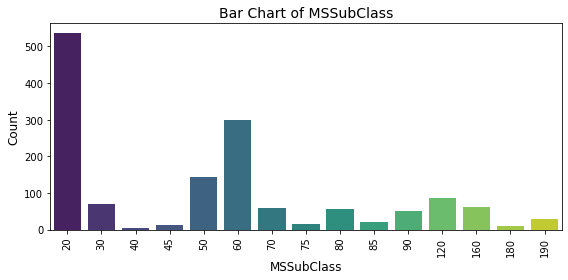

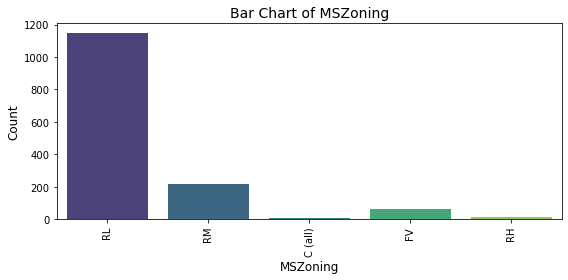

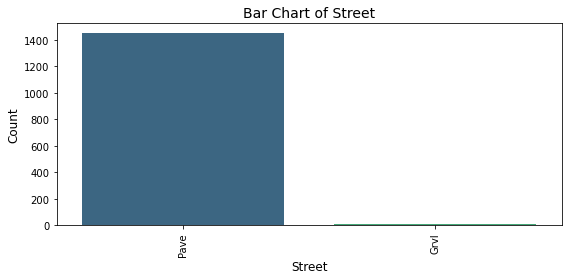

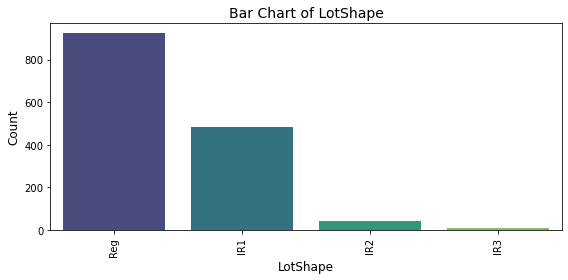

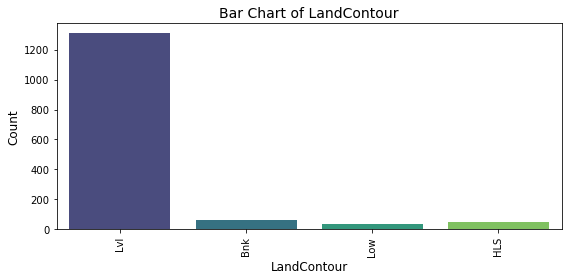

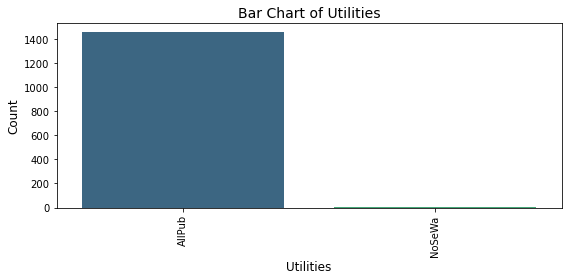

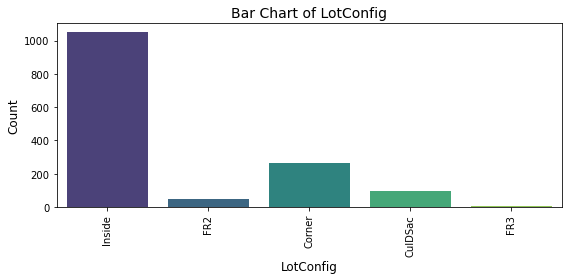

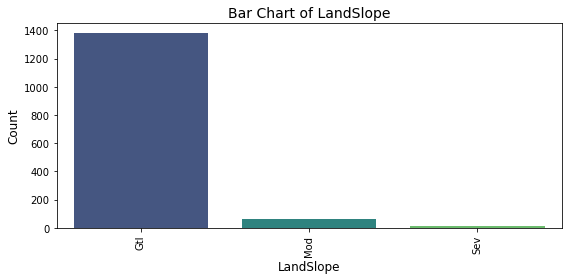

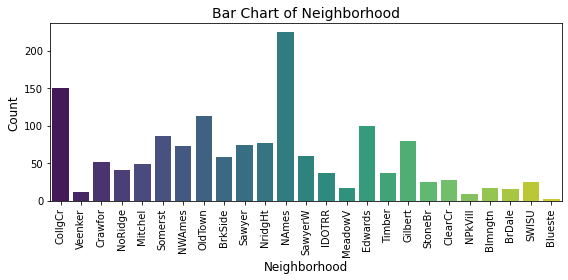

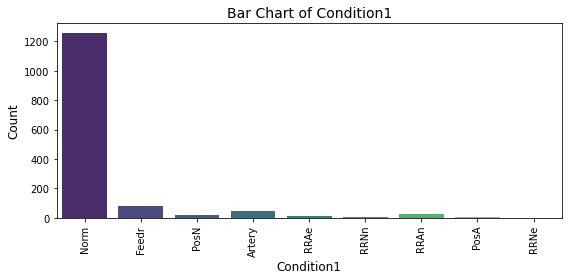

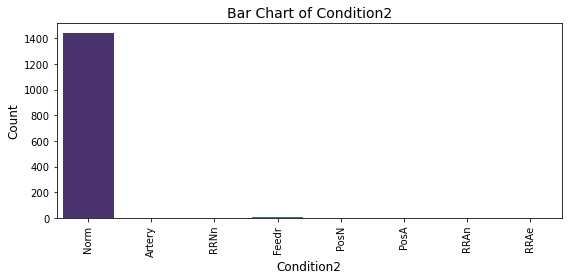

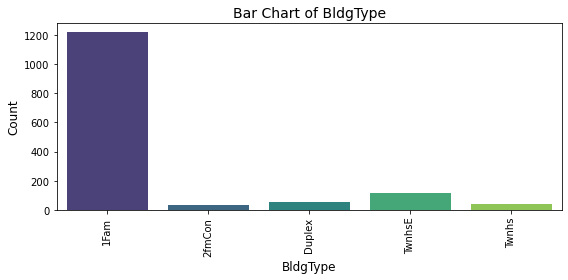

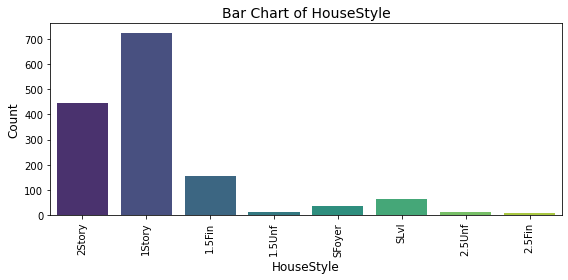

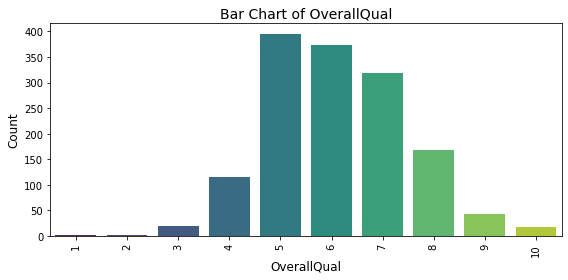

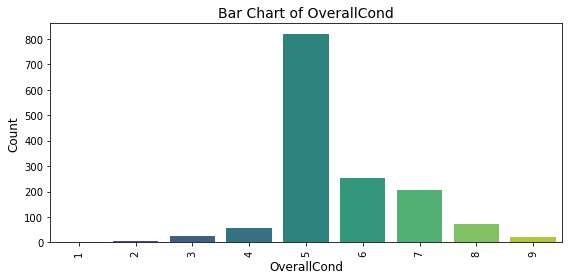

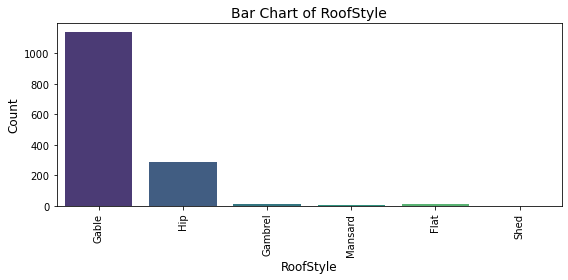

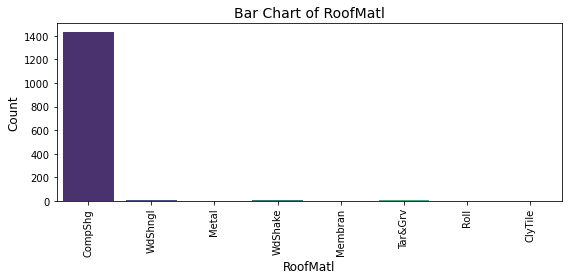

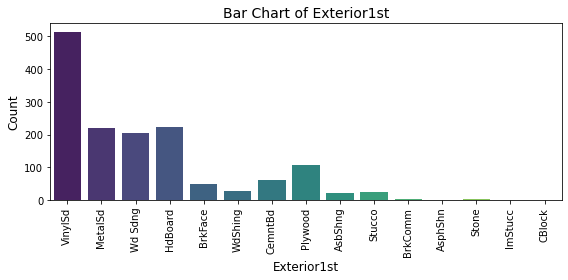

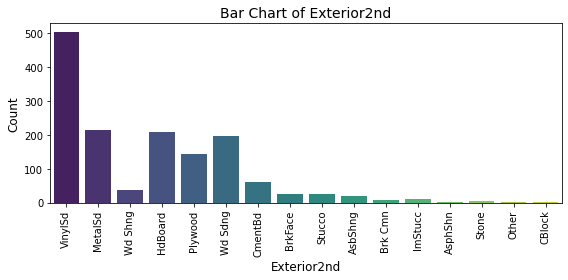

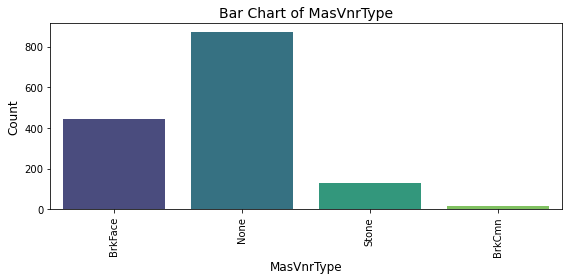

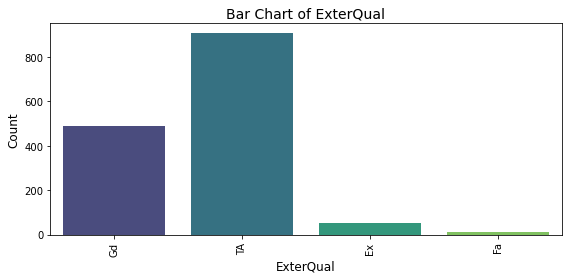

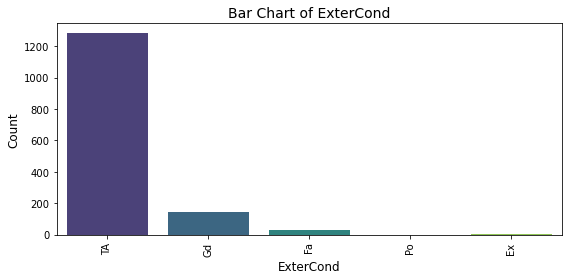

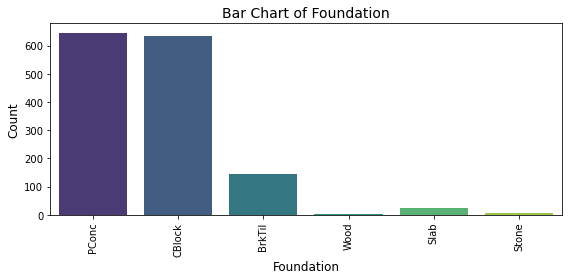

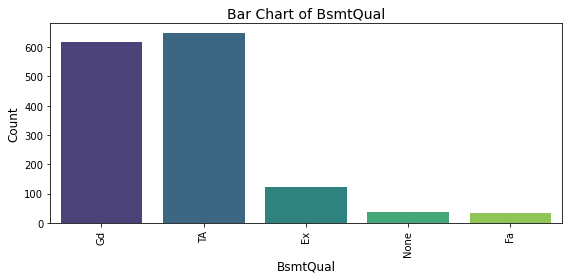

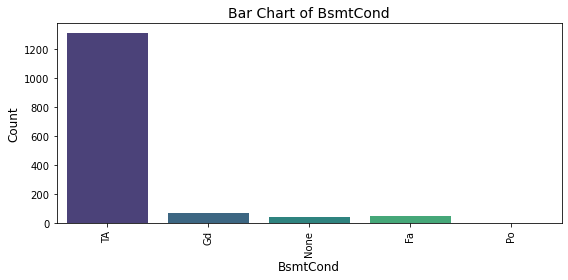

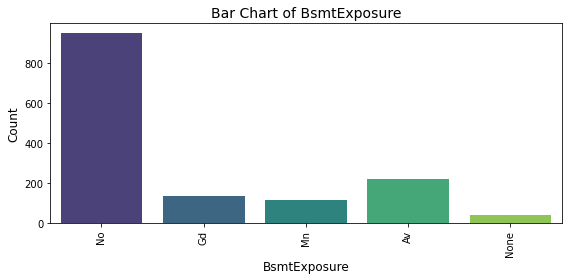

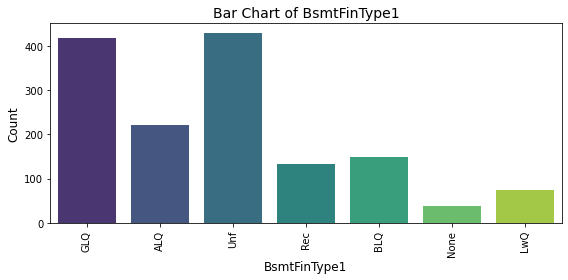

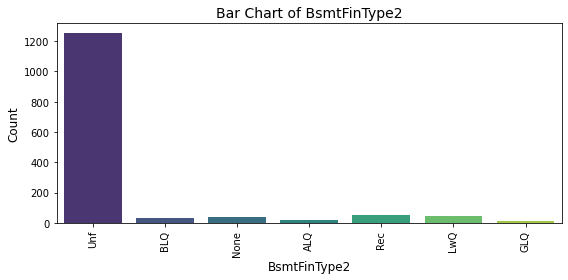

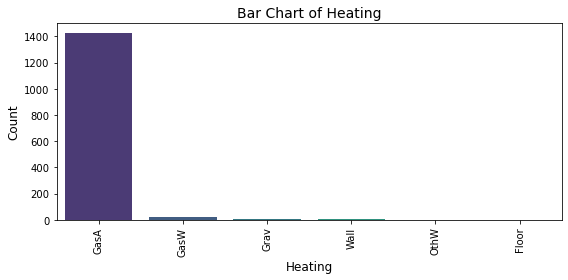

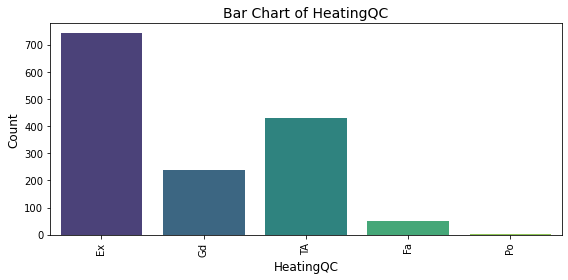

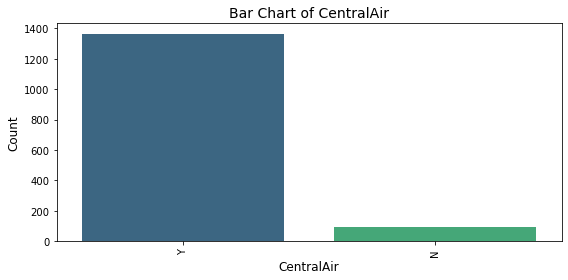

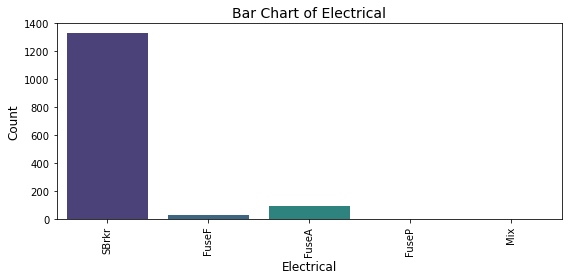

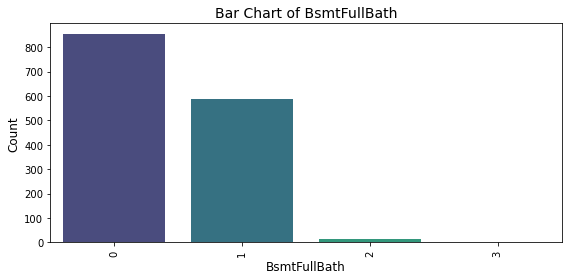

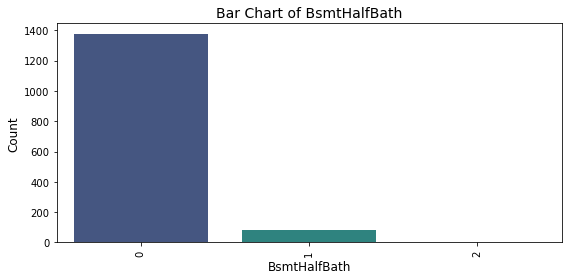

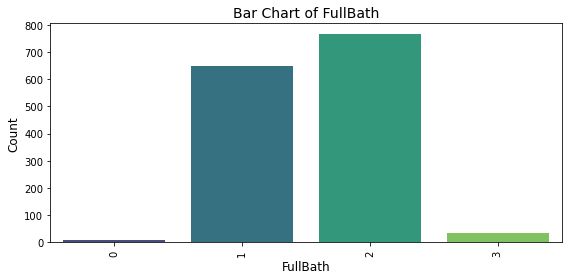

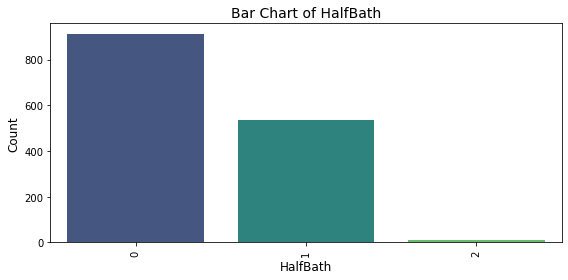

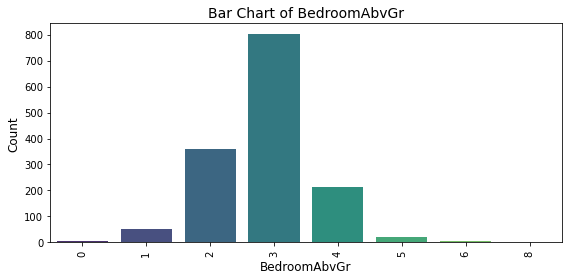

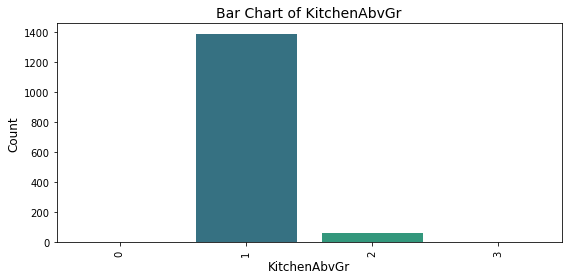

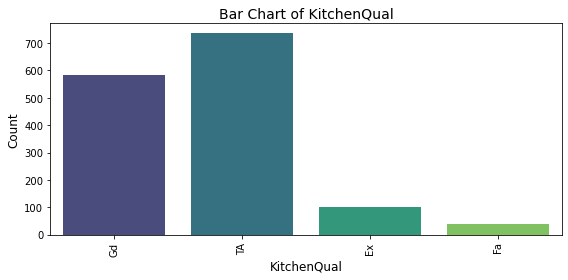

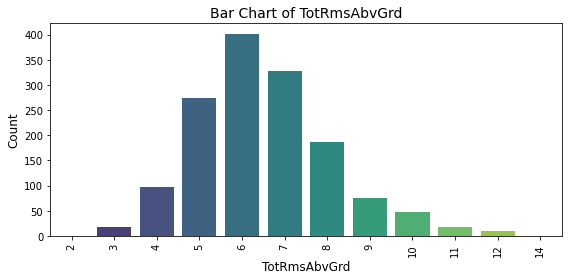

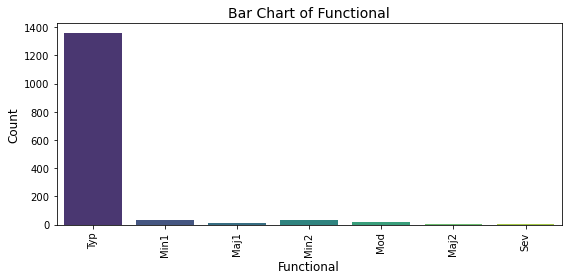

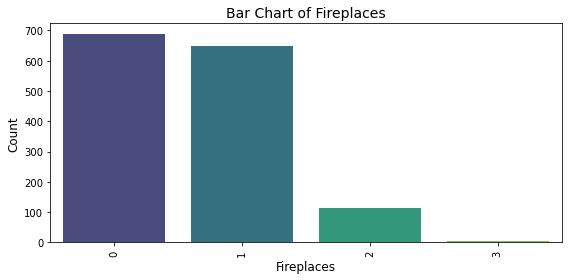

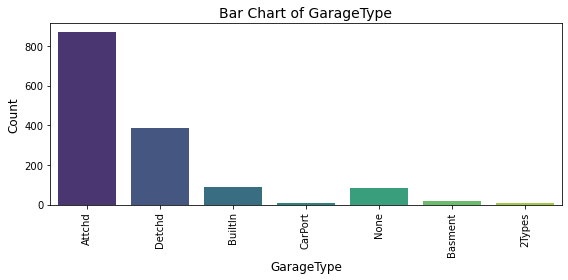

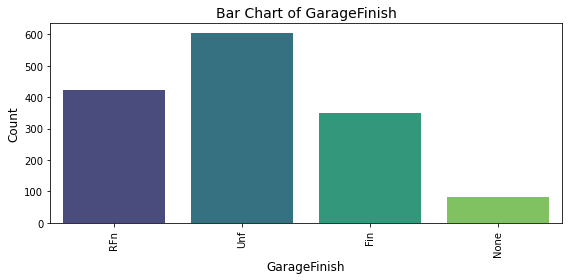

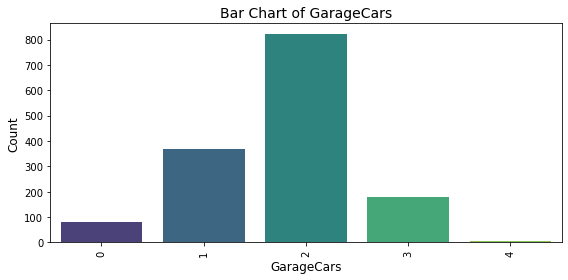

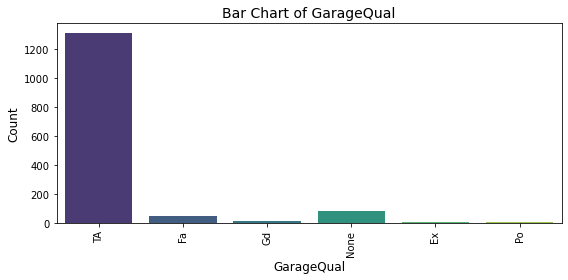

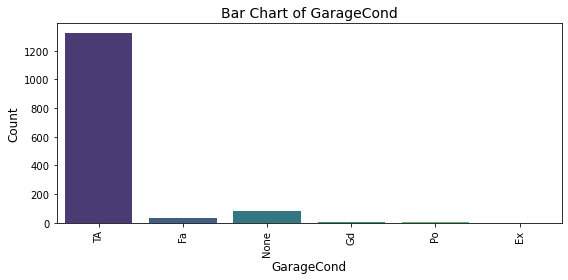

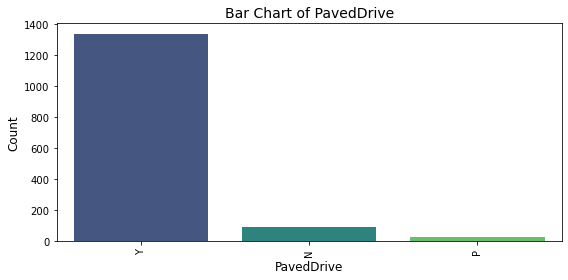

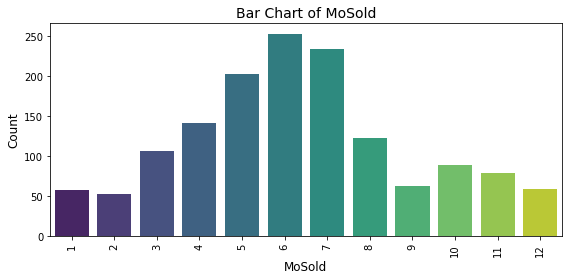

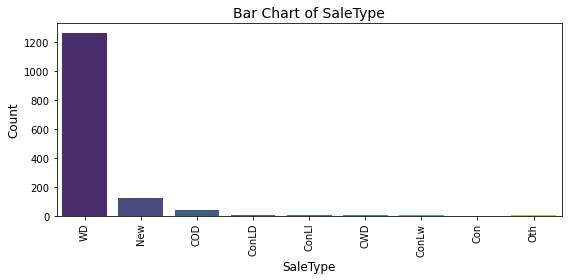

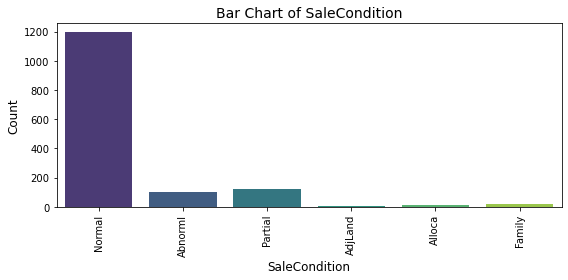

In [21]:
#bar charts
#finding the categorical columns
categorical_columns = houseprice.select_dtypes(include = ["object", "category"]).columns.tolist()
#create barcharts for all categorical columns

# Loop through each categorical column and create a bar chart
for column in categorical_columns:
    plt.figure(figsize=(8, 4))  # Set figure size for each plot
    sns.countplot(data=houseprice, x=column, palette='viridis')  # Create bar chart
    plt.title(f'Bar Chart of {column}', fontsize=14)  # Add title
    plt.xlabel(column, fontsize=12)  # Add x-axis label
    plt.ylabel('Count', fontsize=12)  # Add y-axis label
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot


MSSubClass:    
MSSubClass 20 has the highest count, with over 500 houses, making it the most prevalent residential dwelling type.
MSSubClass 60 is also common, with around 350 houses, and MSSubClass 50 has a notable count of about 150 houses.
The remaining MSSubClass categories have lower counts, indicating they are less common in the dataset.

MSZoning:
RL has the highest count with over 1190 houses.
RM has the second largest count with 200 houses and FV has the moderate count with around 80 houses.
Remaining C(all) and RH has significantly lower counts.

Street:
The bar for "Pave" is significantly taller, with a count of approximately 1450. This indicates that the majority of houses are located on paved streets.
The bar for "Grvl" is significantly lower which indicated very few houses are located in Grvl street.

LotShape:
Reg (approx 850) is showing the highest count means most houses are with Regular lot shapes.
IR1 is showing the second highest count means few houses have slightly irregular shaped lot.
IR2 is showing the third count means very few houses with moderately irregular shaped lot.
IR3 is showing the least count means less amount of houses with severe irregular shaped lot.

LandContour:
The bar for "Lvl" is the tallest, with over 1200 houses means Most houses in the dataset are situated on level land.
The bar for "Bnk" is shorter than "Lvl," indicating a moderate count means some houses are situated on banked land, but it's less common than level land.
The bar for "Low" is shorter than "Bnk," indicating a lower count suggests that fewer houses are situated on low-lying land.
The bar for "HLS" is the shortest, indicating that this category has the lowest count. Very few houses in the dataset are situated on hillside land.

Utilities:
The bar for "AllPub" is significantly taller, with a count of approximately 1450 houses.This indicates that the vast majority of houses have access to all public utilities.
The bar for "NoSeWa" is almost negligible, indicating a very low count.This suggests that very few houses lack access to sewage disposal or water supply.

LotConfig:
The bar for "Inside" is the tallest, indicating that this category has the highest count, with approximately 1000 houses. This suggests that most houses are situated inside lots.
The bar for "Corner" is the second tallest, showing a significant count. This indicates that a considerable number of houses are located on corner lots.
The bar for "CulDSac" is shorter than "Inside" and "Corner," indicating a moderate count. This suggests that some houses are situated on cul-de-sac lots.
The bar for "FR2" is shorter than "CulDSac," indicating a lower count. This suggests that fewer houses are located on frontage lots with two sides.
The bar for "FR3" is the shortest, indicating that this category has the lowest count. Very few houses are situated on frontage lots with three sides.

Landslope:
The bar of Gtl is showing the highest count with around 1390 houses whereas Mod and Sev showing a very small number means that most houses are built on gentle slopes (Gtl).

Neighborhood:
The most common neighborhood is "NAmes", having the highest number of houses, followed by "CollgCr" and "Somerst".
Several neighborhoods have fewer houses, such as "Blueste", "NPkVill", and "BrDale", indicating they might be smaller or less developed areas.
This suggests that certain neighborhoods are more popular or have more housing developments compared to others.

Condition1:
The vast majority of houses fall under the "Norm" (Normal) category, meaning they are in standard locations without major external influences.
A small number of houses are near "Feedr" (feeders/streets), "PosN" (positive proximity to parks), and "Artery" (main roads). 
Other conditions, such as railroads (RRAn, RRAe, RRNe) and arterial roads, have very few houses, indicating that most homes are built in standard residential areas rather than near busy or noisy locations.

Condition2:
The bar chart of Condition2 shows that almost all houses are classified as "Norm", meaning they do not have a secondary proximity influence such as busy roads or railways.
A very small number of houses are near "Feedr" (feeder streets) and even fewer near "Artery" (main roads) or railroads (RRNn, RRAe). This indicates that most houses are located in standard residential areas without major external disturbances.

BldgType:
It shows that the vast majority of houses in the dataset are single-family detached homes (1Fam), indicating that standalone houses are the most common type.
Other building types, such as TwnhsE (townhouses end-unit), Duplex (two-family houses), and 2fmCon (two-family conversions), have significantly fewer houses.
The least common category is Twnhs (townhouse inside unit), suggesting that fully attached townhouses are less prevalent in this dataset.

HouseStyle:
It shows that the most common house styles are "1Story" (one-story homes) and "2Story" (two-story homes), with one-story houses being the most frequent.
The next most common style is "1.5Fin" (one-and-a-half story finished), but it appears much less frequently than the fully finished one- and two-story homes. 
Other styles such as "SLvl" (split-level), "SFoyer" (split-foyer), and "2.5Fin" (two-and-a-half story finished) are much less common, suggesting that the majority of houses in this dataset are either single-story or two-story homes, with very few having unusual designs

OverallQual:
The distribution is centered around 5, 6, and 7, with 5 being the most common rating.
Very few houses have a quality rating below 3 or above 9.
This suggests that most houses are of moderate quality, with fewer having luxurious or extremely poor construction.

OverallCond:
Most houses have an average condition rating of 5, followed by 6 and 7.
Very few houses have extremely poor (1-3) or excellent (8-9) conditions.
This suggests that most houses are in fair condition, with only a small number being in very bad or very good shape.

RoofStyle:
The majority of houses have a "Gable" roof, followed by "Hip" style.
Other styles like "Gambrel", "Mansard", and "Flat" are very rare.
This suggests that Gable and Hip roofs are the most common, possibly due to their durability and cost-effectiveness.

RoofMatl:
Almost all houses use "CompShg" (Composite Shingle) as the roofing material.
Other materials such as "WdShngl" (Wood Shingles), "Metal", and "Membran" are very rarely used.
This suggests that composite shingles are the preferred roofing material, likely due to affordability and ease of maintenance.

Exterior1st:
The most common exterior material is "Vinyl Siding" (VinylSd), followed by "Metal Siding" and "Wd Sdng" (Wood Siding).
Other materials like "Stone", "CBlock" (Cinder Block), and "ImStucc" (Imitation Stucco) are rare.
This suggests that vinyl siding is the dominant exterior material due to its durability and cost-effectiveness.

Exterior2nd:
Similar distribution to Exterior1st, with "Vinyl Siding", "Metal Siding", and "HdBoard" being the most common.
Other materials such as "Brick Face", "Stucco", and "Plywood" are also present but in smaller proportions.
This confirms that most houses have vinyl or metal exteriors, with only a few using alternative materials.

MasVnrType:
Most houses have no masonry veneer (None), followed by "Brick Face".
"Stone" veneer is used in some houses, while "BrkCmn" (Common Brick) is very rare.
This suggests that masonry veneer is not a common feature in most houses, but when used, brick face is the preferred choice.

ExterQual:
The most common quality rating is "TA" (Typical/Average), followed by "Gd" (Good).
Very few houses have "Ex" (Excellent) or "Fa" (Fair) ratings.
This suggests that most homes have standard exterior materials, with only a few exhibiting exceptionally high or low quality.

ExterCond:
Similar to ExterQual, "TA" (Typical) dominates the distribution.
Very few houses have "Po" (Poor) or "Ex" (Excellent) conditions.
This suggests that exterior conditions are generally average, with minimal houses in extremely poor or outstanding condition.

Foundation:
The most common foundation types are "PConc" (Poured Concrete) and "CBlock" (Cinder Block).
Less common foundation types include "BrkTil" (Brick & Tile) and "Slab".
This suggests that poured concrete and cinder block foundations are the preferred construction methods, possibly due to strength and cost-effectiveness.

BsmtQual:
Both Good (Gd) and Typical/Average (TA) basement qualities are the most common, each with approximately 600 houses.
Excellent (Ex) basement quality is less common, with about 100 houses.
Very few houses have either no basement (None) or a fair (Fa) basement quality, each with about 50 houses.

BsmtCond:
The majority of the basements are rated as "TA" (Typical/Average), indicating that most basements are in standard condition.
A small number of houses have "Gd" (Good) or "Fa" (Fair) basement conditions.
A few houses have "Po" (Poor) basement condition or no basement at all.

BsmtExposure:
Most houses have "No" basement exposure, meaning they lack walkout or daylight features.
"Av" (Average) exposure is the second most common, followed by "Gd" (Good) and "Mn" (Minimum) exposure.
Few houses have no basement exposure at all.

BsmtFinType1:
"GLQ" (Good Living Quarters) and "Unf" (Unfinished) are the most common basement finishes.
"ALQ" (Average Living Quarters) also has a significant count.
Other basement types like "Rec" (Recreational Room) and "BLQ" (Below Average Living Quarters) have moderate representation, while "None" indicates no basement.

BsmtFinType2:
Most houses have "Unf" (Unfinished) as the secondary basement type, indicating that these areas are not developed.
Other categories like "BLQ," "ALQ," and "Rec" are present but in very small numbers.

Heating Type:
"GasA" (Gas forced air) is the dominant heating system used in almost all houses.
Other heating types like "GasW" (Gas water) and "Grav" (Gravity) exist but are very rare.

Heating Quality:
"Ex" (Excellent) heating quality is the most common, followed by "TA" (Typical/Average) and "Gd" (Good).
"Fa" (Fair) and "Po" (Poor) heating quality have very few occurrences.

CentralAir:
Most houses have central air conditioning (represented by "Y").
A small fraction of houses do not have central air (represented by "N").

Electrical System:
"SBrkr" (Standard Circuit Breakers) is the most widely used electrical system.
A few houses have "FuseA" and "FuseF" (fuse-based systems), while "FuseP" and "Mix" are rare.

BsmtFullBath:
Most houses have no basement bathrooms.
A significant number of houses have one full bathroom in the basement.
Very few houses have two or more basement bathrooms.

BsmtHalfBath:
The majority of houses have no half bathrooms in the basement.
A small number of houses have one basement half-bathroom, and very few have two.

FullBath:
Most houses have either 1 or 2 full bathrooms.
The highest count is for houses with 2 full bathrooms, followed by 1 full bathroom.
Very few houses have 3 full bathrooms, and almost none have 0.

HalfBath:
Most houses have no half bathrooms.
A significant number of houses have 1 half-bath, while very few have 2.
This suggests that additional half-baths are less common in the dataset.

BedroomAbvGr:
The most common number of bedrooms above ground is 3.
Houses with 2 and 4 bedrooms are also quite frequent.
Houses with more than 5 bedrooms are rare, making them outliers.

KitchenAbvGr:
The majority of houses have only 1 kitchen above ground.
A small number of houses have 2 kitchens, while almost none have 3.
This suggests that houses with multiple kitchens are rare in this dataset.

KitchenQual:
Most kitchens are rated as either "TA" (Typical/Average) or "Gd" (Good).
Some kitchens are of "Ex" (Excellent) quality, but a small fraction are "Fa" (Fair).
This indicates that most homes have average or good-quality kitchens.

TotRmsAbvGrd:
The most common number of total rooms above ground is 6, followed by 7 and 5.
Houses with fewer than 4 rooms or more than 10 rooms are uncommon.
This suggests that mid-sized homes are the norm.

Functional:
The vast majority of houses are labeled as "Typ" (Typical Functionality).
A few homes have minor or major functional issues, but they are rare.
This indicates that most homes are in functional condition.

Fireplaces:
Many houses have no fireplaces, while a nearly equal number have 1 fireplace.
Houses with 2 fireplaces are less common, and very few have 3.
This suggests that having at least one fireplace is a common feature in the dataset.

GarageType:
The most common garage type is "Attchd" (Attached Garage), followed by "Detchd" (Detached Garage).
Some houses have "Built-In" garages, while "CarPort" and "Basement" garages are rare.
A small fraction of houses have no garage.

GarageFinish:
"Unf" (Unfinished) garages are the most common, followed by "RFn" (Rough Finished).
"Fin" (Finished) garages are also present but less common.
Some houses have no garage at all.

GarageCars:
The most common garage size is 2-car garages, followed by 1-car garages.
A smaller portion of houses has 3-car garages, and very few have 4-car garages or no garage at all.
This suggests that most homes are designed to accommodate at least 1 or 2 vehicles.

GarageQual:
The majority of garages are rated "Typical/Average (TA)" in quality.
Very few garages are rated "Excellent (Ex)" or "Poor (Po)".
This indicates that most garages are in standard condition, neither too luxurious nor too degraded.

GarageCond:
Similar to GarageQual, most garages have a "Typical/Average (TA)" condition.
Some garages are Fair (Fa) or Good (Gd), while very few are Poor (Po) or Excellent (Ex).
This means that most garages meet general standards but do not necessarily stand out in quality or condition.

PavedDrive:
A significant majority of houses have paved driveways (Y).
A smaller number have "Partial paving (P)" or "No paving (N)".
This suggests that paved driveways are a standard feature for most homes.

MoSold:
The sales peak occurs in June and July, with May also showing a high count.
Sales drop significantly in the winter months (January, February, and December).
This pattern aligns with seasonal home-buying trends, where demand is higher in summer.

SaleType:
The dominant sale type is "WD" (Warranty Deed), which indicates traditional home sales.
Other sale types, like "New" (new home purchases) and "COD" (Cash on Delivery), occur much less frequently.
This suggests that most homes are sold through standard home-buying processes.

SaleCondition:
The vast majority of homes are sold under "Normal" conditions, meaning typical, non-distressed sales.
A small number of homes are sold under "Abnormal" conditions (foreclosures, quick sales, etc.).
This indicates that most home sales in the dataset are standard transactions rather than distressed or forced sales.


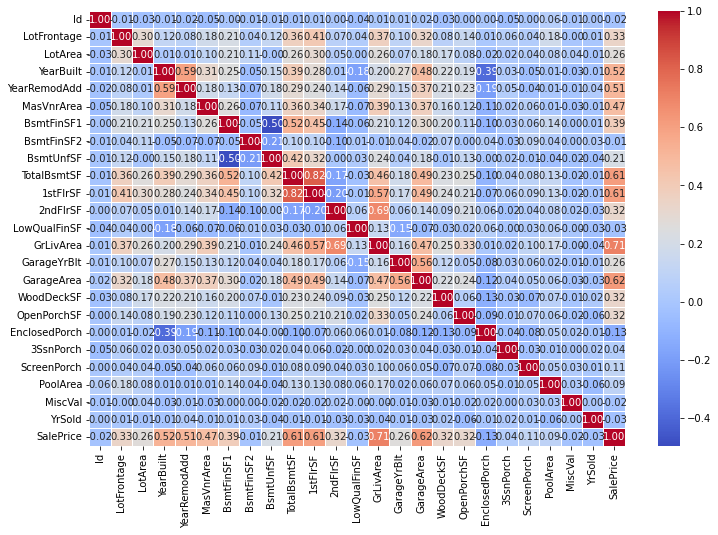

In [22]:
##Correlation heatmap 
#using seaborn to create correlation matrix
#have to use corr() function on dataframe
#sns.heatmap(corr, annot = True (for showing the values), cmap= "coolwarm" (show color))

# Compute correlation matrix
corr = houseprice.corr()

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust width & height as needed

# Plot heatmap with annotation
#plt.figure(figsize=(12, 8)) → Increases the plot size (Adjust numbers as needed)
#fmt=".2f" → Formats the correlation values to 2 decimal places
#linewidths=0.5 → Adds lines between cells for better readability
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

In [ ]:
Strong Positive Correlations:
OverallQual and SalePrice: Correlation value ~0.8.
GrLivArea and TotRmsAbvGrd: Correlation value ~0.8.
GarageCars and GarageArea: Correlation value ~0.85.
TotalBsmtSF and 1stFlrSF: Correlation value ~0.8.

Weak Correlations:
YrSold and SalePrice: Correlation value ~0.
LowQualFinSF and GrLivArea: Correlation value ~0.04.
BsmtFinSF2 and TotalBsmtSF: Correlation value ~0.18.

Negative Correlations:
OverallQual and Age: Correlation value ~-0.2.
GarageYrBlt and Age: Correlation value ~-0.4.

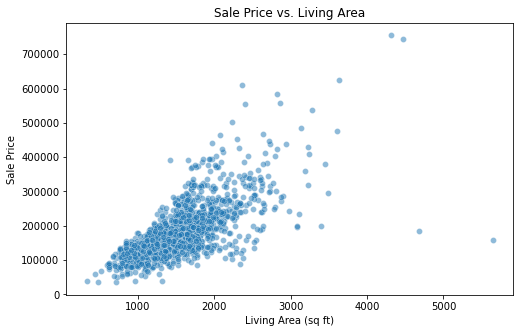

In [24]:
#Scatterplt - Sales price vs living area as both are continuous 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=houseprice["GrLivArea"], y=houseprice["SalePrice"], alpha=0.5)
plt.title("Sale Price vs. Living Area")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()


Its showing that larger house tends to have higher sale price.

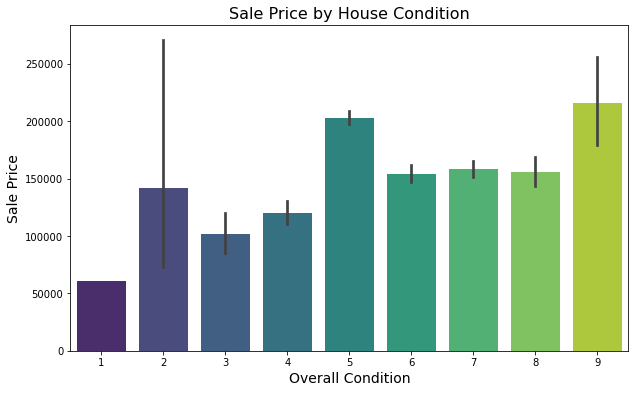

In [25]:

# Create a bar plot for average SalePrice by OverallCond
plt.figure(figsize=(10, 6))
sns.barplot(x=houseprice["OverallCond"], y=houseprice["SalePrice"], palette='viridis')
plt.title("Sale Price by House Condition", fontsize=16)
plt.xlabel("Overall Condition", fontsize=14)
plt.ylabel("Sale Price", fontsize=14)
plt.show()

It shows that poor-condition houses (1-3) have the lowest prices, houses with average condition (5-6) sell for prices similar to those in good condition (7-8).
This suggests that buyers prioritize other factors (like house quality, size, and location) over condition alone.

Text(0, 0.5, 'Average Sale Price')

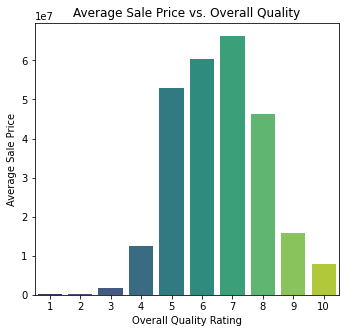

In [40]:
#hypothesis testing
#1. Houses with higher quality ratings (OverallQual) tend to have significantly higher sale prices
# Set figure size for better visibility
plt.figure(figsize=(12, 5))

# Bar chart for OverallQual vs. SalePrice
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=houseprice["OverallQual"], y=houseprice["SalePrice"],estimator=sum, ci=None, palette="viridis") #showing no error bars, only showing the mean
plt.title("Average Sale Price vs. Overall Quality")
plt.xlabel("Overall Quality Rating")
plt.ylabel("Average Sale Price")


In [ ]:
House with quality ratings of 5,6,7,8 have the positive trends for average sales 

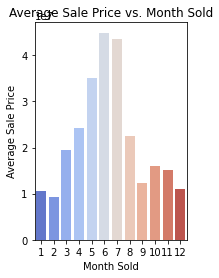

In [38]:
#2.Houses sold in summer months (May - July) tend to have higher average sale prices compared to houses sold in winter months (December - February).
# Bar chart for MoSold vs. SalePrice
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=houseprice["MoSold"], y=houseprice["SalePrice"],estimator=sum, ci=None,  palette="coolwarm")
plt.title("Average Sale Price vs. Month Sold")
plt.xlabel("Month Sold")
plt.ylabel("Average Sale Price")

# Show the plots
plt.show()

Here showing that Month with the number of 5,6,7 - May, June, July which are Summer months tends to have higher sale prices for the houses.
Months with the number of 9-12 - september,October,November and December which are winter months tends to have lower sale prices.
So Sales price is affected by seasonality.